In [1]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data collection

In [2]:
# reading the .data file using pandas
file_path="C:/Abdelouaheb/perso/Ph/machine_learning_pipeline/data/auto+mpg/auto-mpg.data"
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(file_path, names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

data = df.copy()

# Problem statement

## Explotary data Analysis

## Data shape 

In [3]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
data.shape

(398, 8)

## Data structure and types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


## Missing values

In [7]:
missing_vales_per = round(data.isnull().sum()/data.shape[0],2)
print(missing_vales_per)
print("#"*50)
missing_vales= data.isnull().sum()
print(missing_vales)

MPG             0.00
Cylinders       0.00
Displacement    0.00
Horsepower      0.02
Weight          0.00
Acceleration    0.00
Model Year      0.00
Origin          0.00
dtype: float64
##################################################
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [13]:
# Numerical data the nature of missing values calculate the rate of missing value for each variable
# When we have huge dataset and in one row or indivdus we have much of Variables values missed..>
# When have the missing value consentarrte in one varaible
# Create new machine learning model we ill predict the values of missing valuese
# mean / average / mode 

## Check Outliers

In [8]:
# Using Z 
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [9]:
print(type(data.MPG.to_list()))

<class 'list'>


In [11]:
col = data.columns.to_list()
colect = []
for i in col :
    data1 = data[i].tolist()
    outlier_pt=detect_outliers(data1)
    colect.append(outlier_pt)
colect
        

[[24.8, 24.6, 24.8, 24.6],
 [24.8, 24.6, 24.8, 24.6],
 [24.8, 24.6, 24.8, 24.6],
 [24.8, 24.6, 24.8, 24.6],
 [24.8, 24.6, 24.8, 24.6],
 [24.8, 24.6, 24.8, 24.6],
 [24.8, 24.6, 24.8, 24.6],
 [24.8, 24.6, 24.8, 24.6]]

In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
quantile1 = df.quantile(0.25)
quantile3 = df.quantile(0.75)

# Calculate the IQR
iqr = quantile3 - quantile1
#print("IQR for each column:")
#print(iqr)

# Calculate lower and upper bounds
lower_bound = quantile1 - (1.5 * iqr)
upper_bound = quantile3 + (1.5 * iqr)

#print("\nLower Bound for each column:")
#print(lower_bound)

#print("\nUpper Bound for each column:")
#print(upper_bound)

# Detect outliers for each column
outliers = ((df < lower_bound) | (df > upper_bound))

#print("\nOutliers detected (True means outlier):")
#print(outliers)

# Extract the rows that contain outliers
outliers_data = df[outliers.any(axis=1)]
print("\nData containing outliers:")
print(outliers_data)


Data containing outliers:
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
6    14.0          8         454.0       220.0  4354.0           9.0   
7    14.0          8         440.0       215.0  4312.0           8.5   
8    14.0          8         455.0       225.0  4425.0          10.0   
9    15.0          8         390.0       190.0  3850.0           8.5   
11   14.0          8         340.0       160.0  3609.0           8.0   
13   14.0          8         455.0       225.0  3086.0          10.0   
25   10.0          8         360.0       215.0  4615.0          14.0   
27   11.0          8         318.0       210.0  4382.0          13.5   
59   23.0          4          97.0        54.0  2254.0          23.5   
67   11.0          8         429.0       208.0  4633.0          11.0   
94   13.0          8         440.0       215.0  4735.0          11.0   
95   12.0          8         455.0       225.0  4951.0          11.0   
116  16.0          8         400.0   

In [13]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [14]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


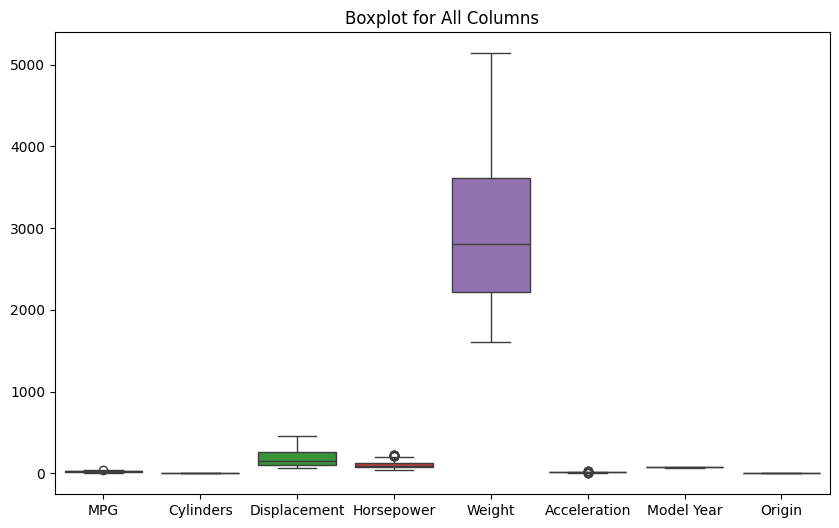

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot for All Columns')
plt.show()

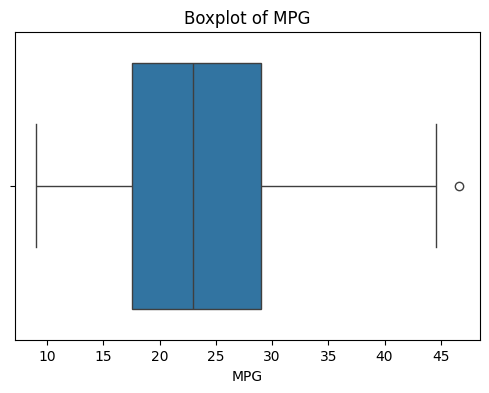

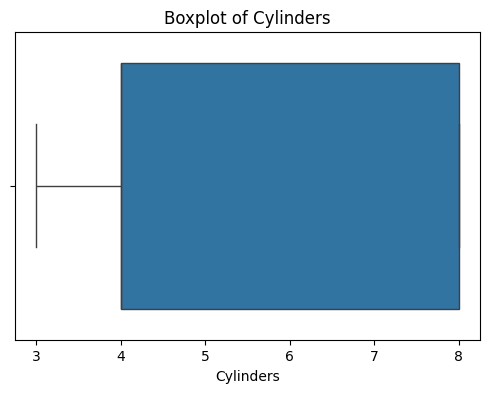

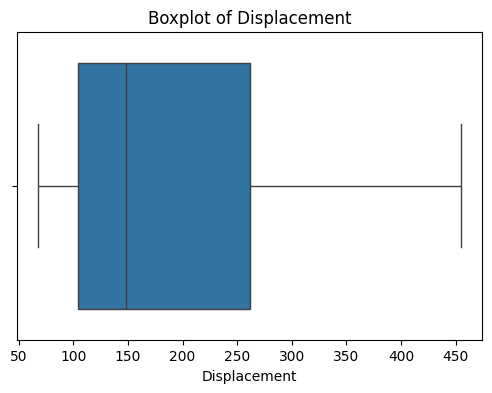

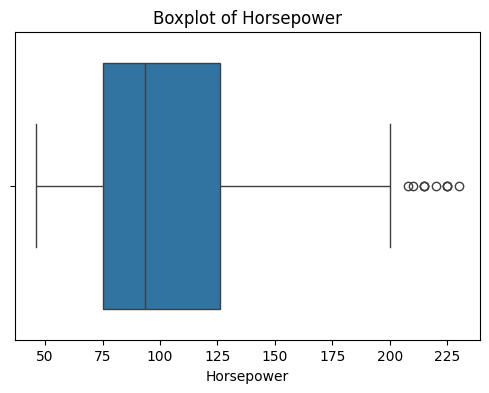

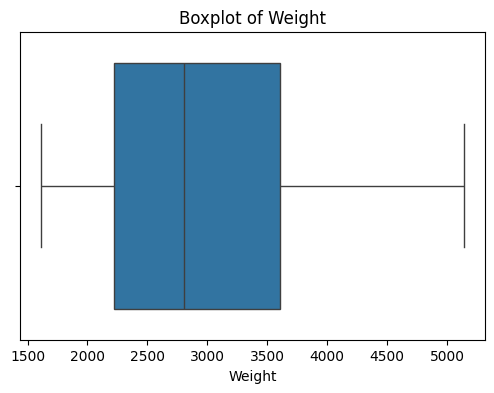

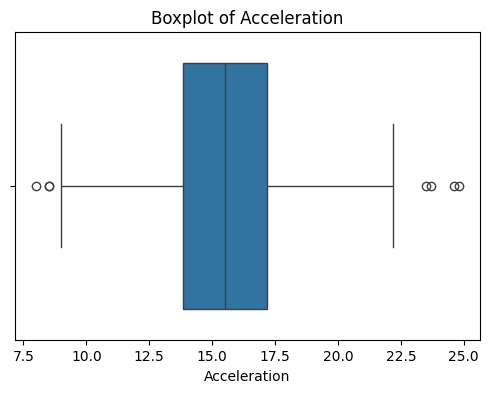

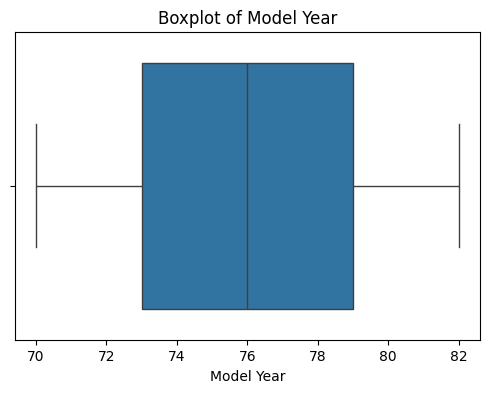

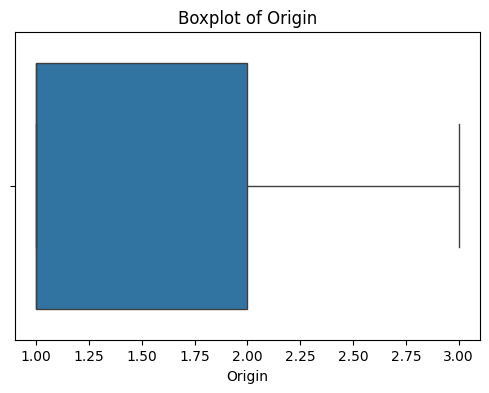

In [16]:
# Loop through each column and create separate boxplots
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

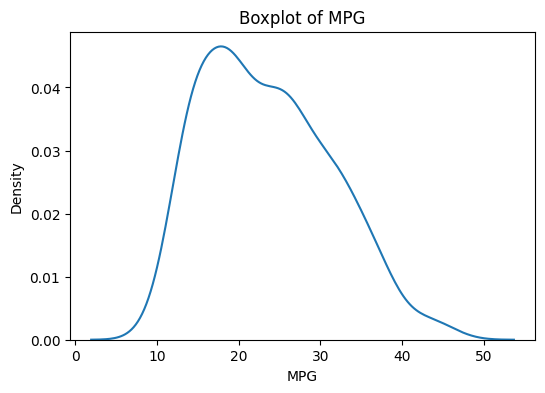

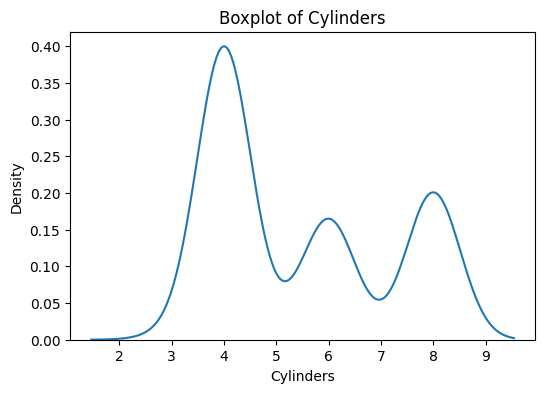

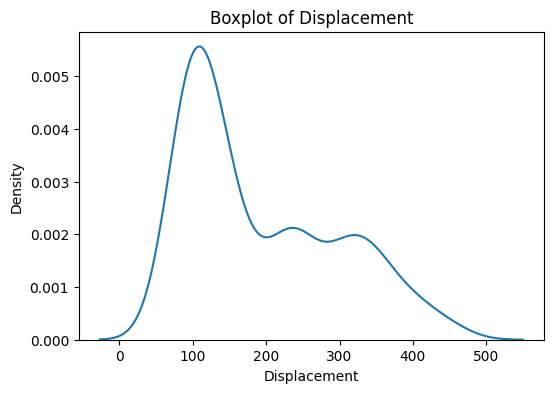

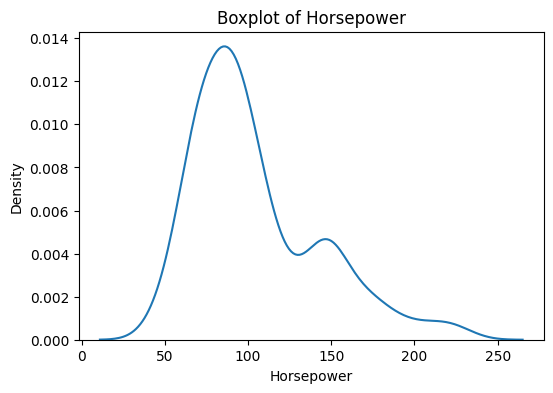

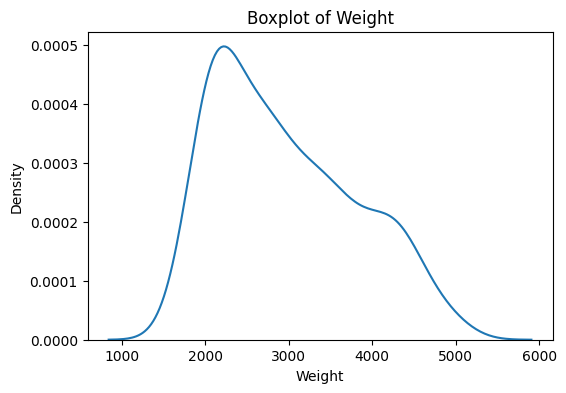

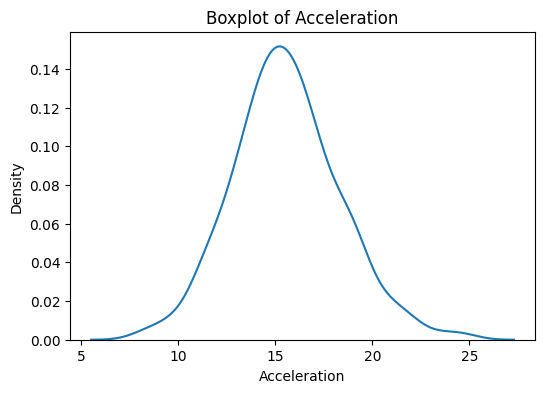

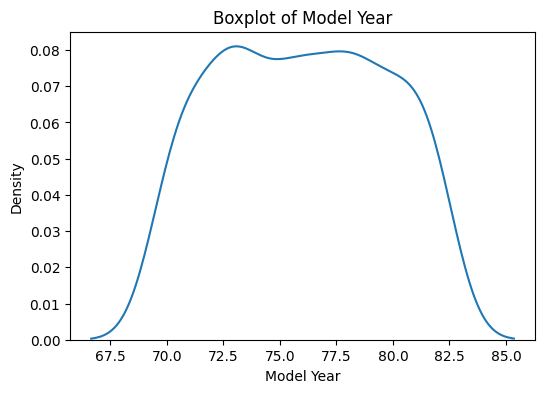

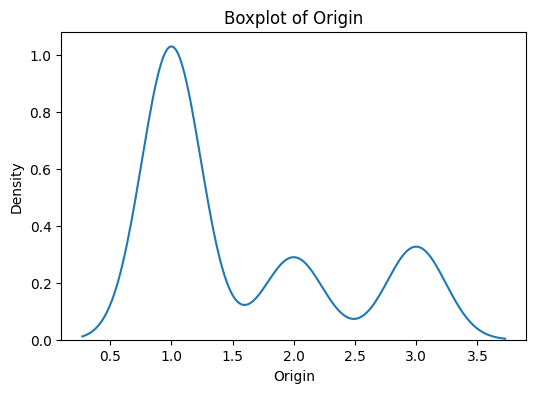

In [18]:
# Loop through each column and create separate boxplots
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [58]:
data.describe(include='integer')

,Cylinders,Model Year,Origin
count,398.000000,398.000000,398.000000
mean,5.454774,76.010050,1.572864
std,1.701004,3.697627,0.802055
min,3.000000,70.000000,1.000000
25%,4.000000,73.000000,1.000000
50%,4.000000,76.000000,1.000000
75%,8.000000,79.000000,2.000000
max,8.000000,82.000000,3.000000


In [32]:
agg = {"Cylinders" : data["Cylinders"].value_counts() ,
       "Cylinders_per" : round(data["Cylinders"].value_counts() / len(data),2)}
agg1 = {"Origin" : data["Origin"].value_counts() ,
       "Origin_per" : round(data["Origin"].value_counts() / len(data),2) }
agg2 = {"Model_Year" : data["Model Year"].value_counts() ,
       "Model_Year_per" : round(data["Model Year"].value_counts() / len(data),2)}

In [33]:
agg_1 = pd.DataFrame(agg).reset_index(drop=True)
agg_2 = pd.DataFrame(agg1).reset_index(drop=True)
agg_3 = pd.DataFrame(agg2).reset_index(drop=True)
agg_1,agg_2,agg_3

(   Cylinders  Cylinders_per
 0        204           0.51
 1        103           0.26
 2         84           0.21
 3          4           0.01
 4          3           0.01,
    Origin  Origin_per
 0     249        0.63
 1      79        0.20
 2      70        0.18,
     Model_Year  Model_Year_per
 0           40            0.10
 1           36            0.09
 2           34            0.09
 3           31            0.08
 4           30            0.08
 5           29            0.07
 6           29            0.07
 7           29            0.07
 8           29            0.07
 9           28            0.07
 10          28            0.07
 11          28            0.07
 12          27            0.07)

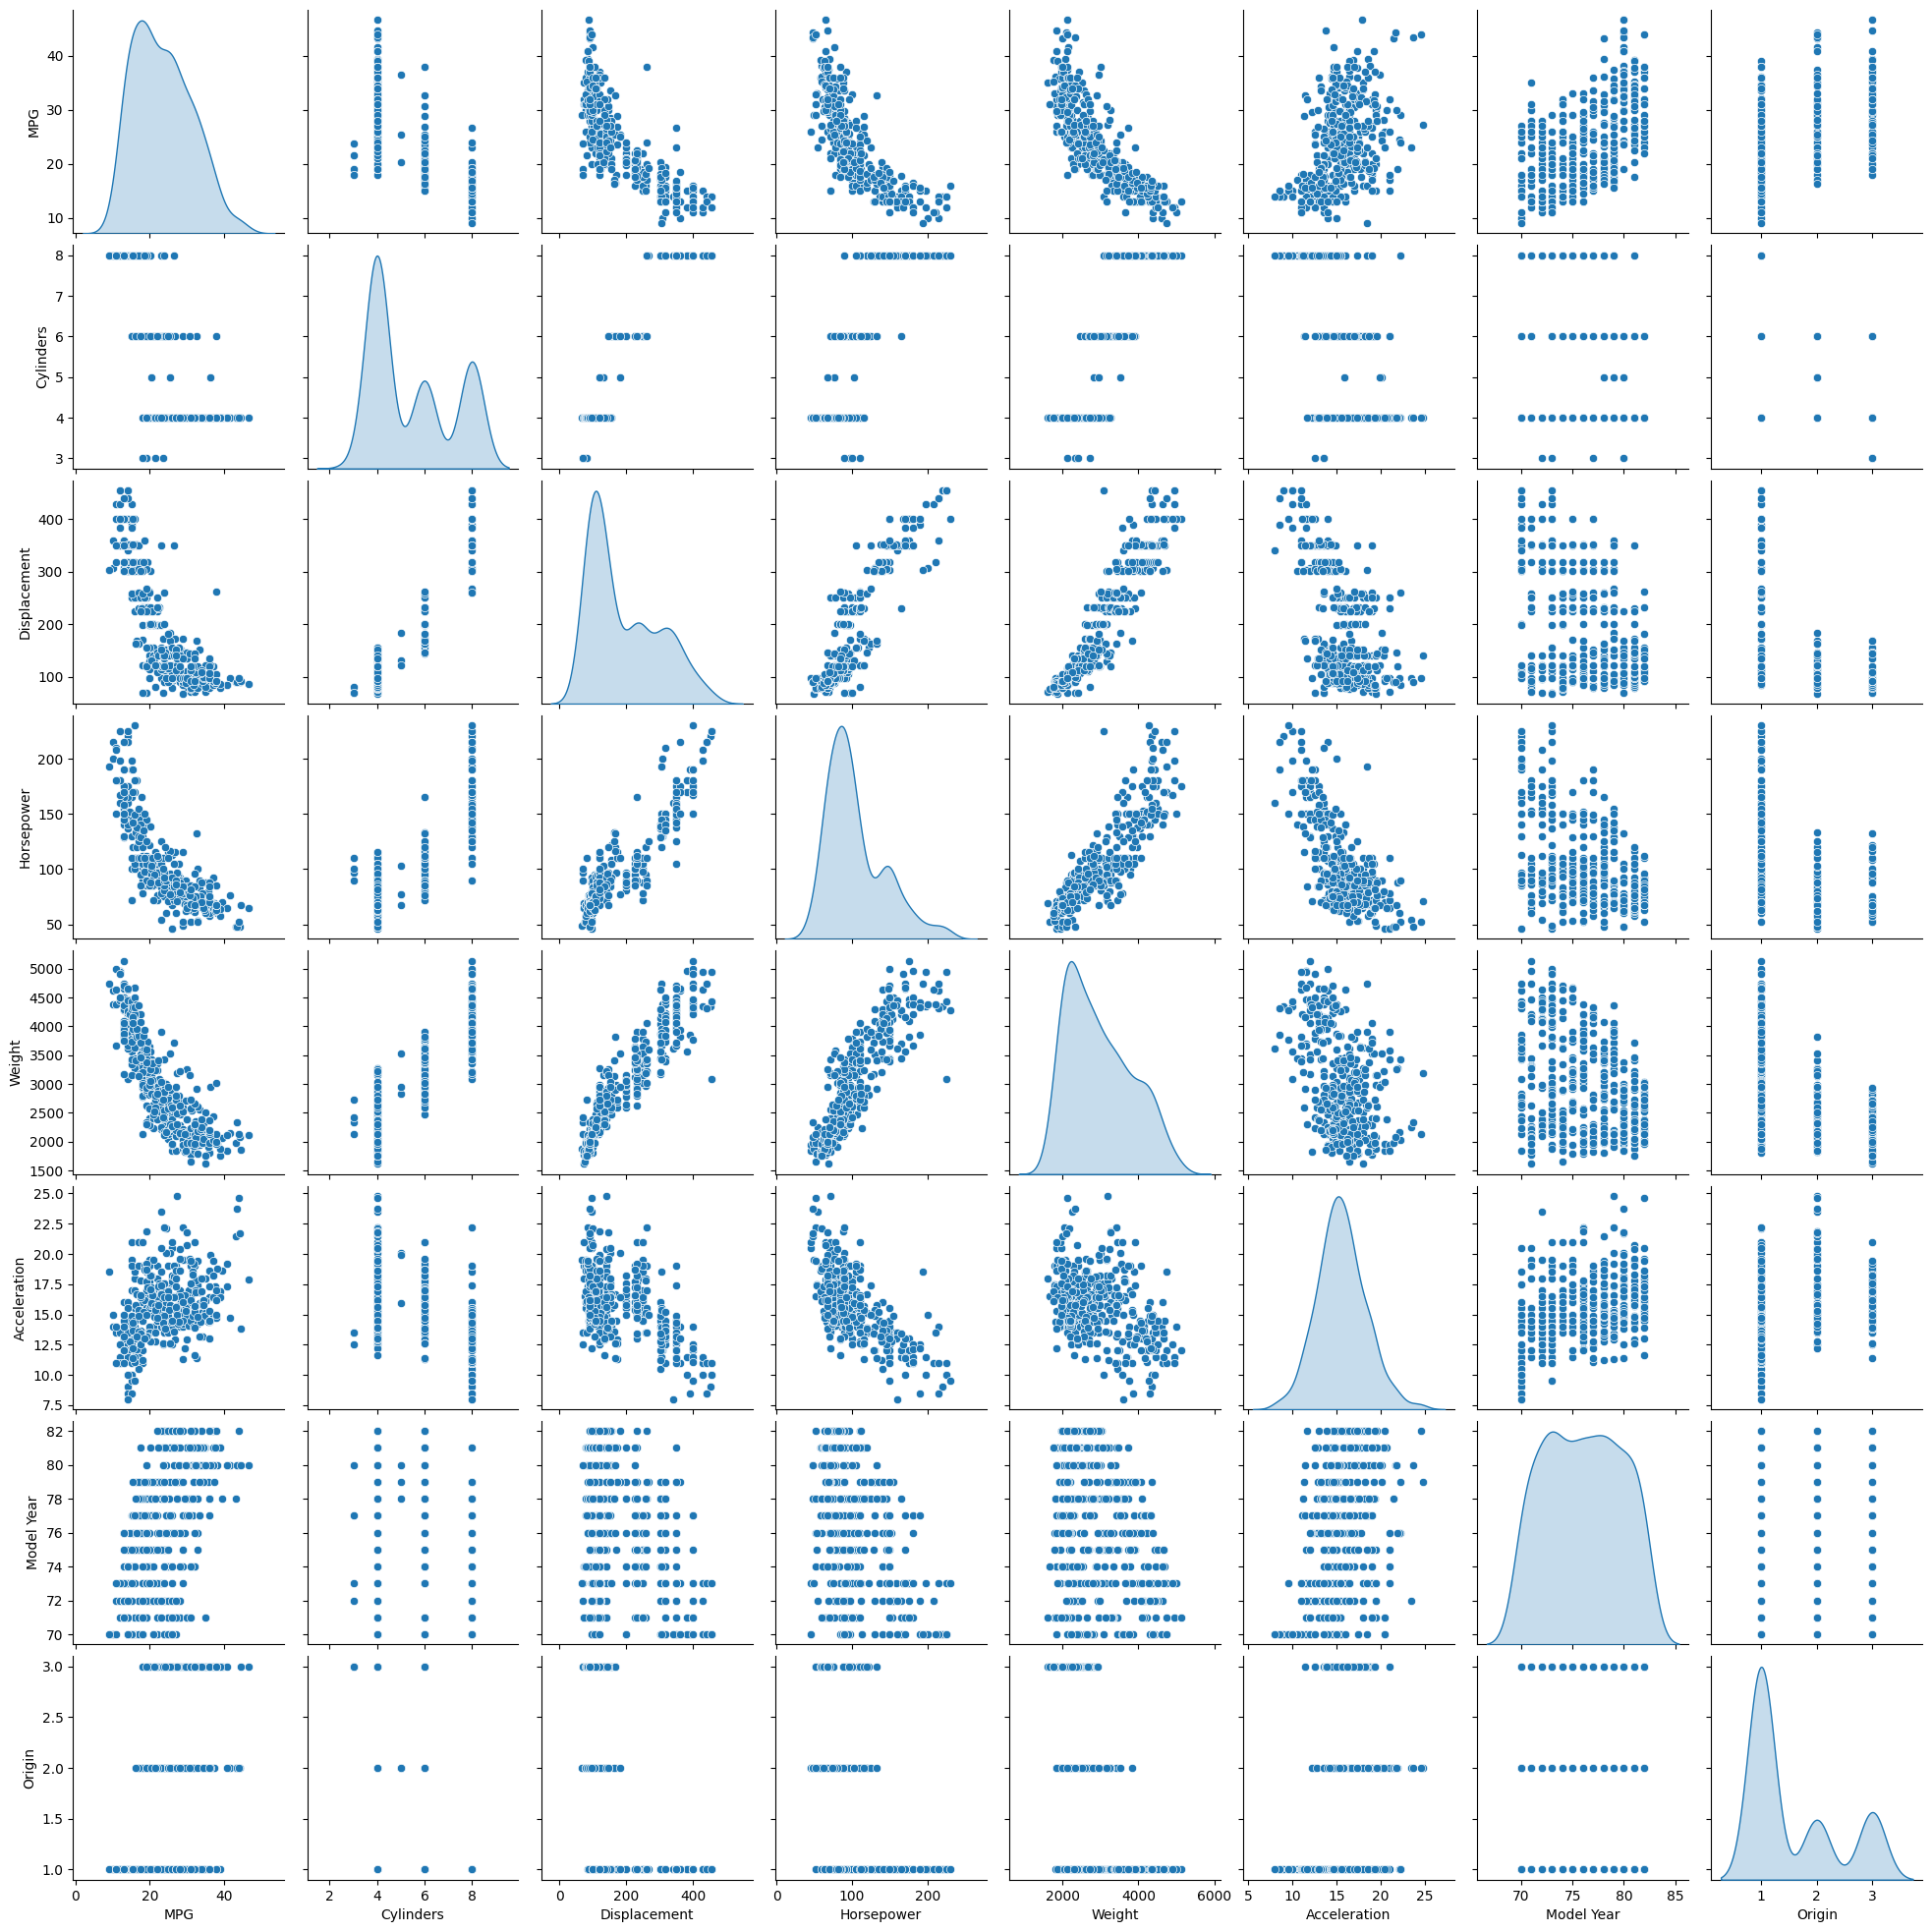

In [59]:
##pairplots to get an intuition of potential correlations
sns.pairplot(data, diag_kind="kde")

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit , train_test_split
split_stra = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split_stra.split(data, data['Cylinders']):
    strat_train_set= data.loc[train_index]
    strat_test_set= data.loc[test_index]

In [38]:
data = strat_train_set.drop('MPG', axis=1)

data_labels = strat_train_set['MPG'].copy()

In [41]:
def processing_origin_columns(df):
    df['Origin'] = df["Origin"].map({1:'India',2: "USA", 3 : "Germany"})
    return df
data_tr= processing_origin_columns(data)
data_tr.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA


In [43]:
data_tr['Origin'].value_counts()

Origin
India      198
Germany     60
USA         60
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
data_cat = data_tr[['Origin']]
cat_encoder = OneHotEncoder()
data_cat_enc = cat_encoder.fit_transform(data_cat)
data_cat_enc

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 318 stored elements and shape (318, 3)>

In [46]:
type(data_cat_enc)

scipy.sparse._csr.csr_matrix

In [47]:
data_cat_enc.toarray()[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [48]:
cat_encoder.categories_

[array(['Germany', 'India', 'USA'], dtype=object)]

In [51]:
num_data = data.iloc[:,:-1]
num_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
145,4,83.0,61.0,2003.0,19.0,74
151,4,79.0,67.0,2000.0,16.0,74
388,4,156.0,92.0,2585.0,14.5,82
48,6,250.0,88.0,3139.0,14.5,71
114,4,98.0,90.0,2265.0,15.5,73
...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74
156,8,400.0,170.0,4668.0,11.5,75
395,4,135.0,84.0,2295.0,11.6,82
14,4,113.0,95.0,2372.0,15.0,70


In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

c= imputer.fit_transform(num_data)
c


array([[   4. ,   83. ,   61. , 2003. ,   19. ,   74. ],
       [   4. ,   79. ,   67. , 2000. ,   16. ,   74. ],
       [   4. ,  156. ,   92. , 2585. ,   14.5,   82. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  113. ,   95. , 2372. ,   15. ,   70. ],
       [   6. ,  146. ,  120. , 2930. ,   13.8,   81. ]])

In [54]:
num_data.isna().sum()

Cylinders       0
Displacement    0
Horsepower      4
Weight          0
Acceleration    0
Model Year      0
dtype: int64

In [58]:
data_tr = pd.DataFrame(c, columns=num_data.columns, index=num_data.index)
data_tr
data_tr.isna().sum()

Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
dtype: int64